In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_sites=5000
n_timesteps=1000
pup=0.9
pdown=0.1
i_site=2000

In [3]:
p=np.zeros(n_sites)
p_old=np.zeros(n_sites)
ratio=np.zeros(n_timesteps)
positions = np.arange(0, n_sites)
mean_position=np.zeros(n_timesteps)
current_av=np.zeros(n_timesteps)
entropy_production=np.zeros(n_timesteps)
p[0]=1
ratio[0]=1
for i in range(1,n_timesteps):
    p_old=p.copy()
    p[0] = p_old[0] + pdown * p_old[1] - pup * p_old[0]
    for j in range(1, n_sites - 1):
        p[j] = p_old[j] + (pup * p_old[j - 1] + pdown * p_old[j + 1]) - (pup + pdown) * p_old[j]
    p[n_sites - 1] = p_old[n_sites - 1] + pup * p_old[n_sites - 2] - pdown * p_old[n_sites - 1]
    p /= np.sum(p)
    ratio[i]=p[i_site+1]/p[i_site] if p[i_site] != 0 else 0
    mean_position[i] = np.sum(positions * p)
    current_av[i] = mean_position[i] - mean_position[i - 1]
    # Entropy production rate
    S_prod = 0.0
    for j in range(0, n_sites - 1):  # bond j → j+1
        fwd = p_old[j] * pup
        bwd = p_old[j + 1] * pdown
        if fwd > 0 and bwd > 0:
            S_prod += 1/2*(fwd - bwd) * np.log(fwd / bwd)
    entropy_production[i] = S_prod
print(np.sum(p))

1.0


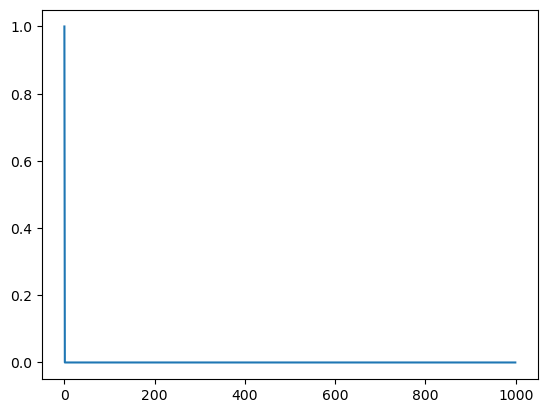

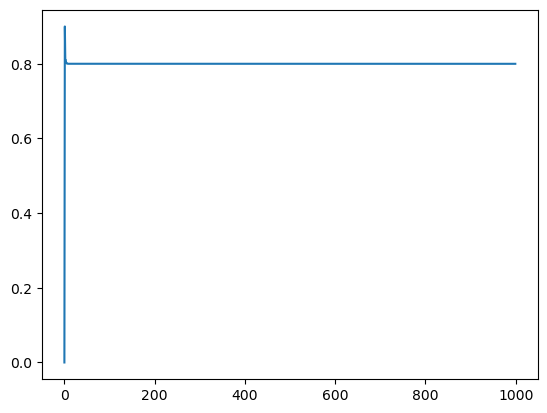

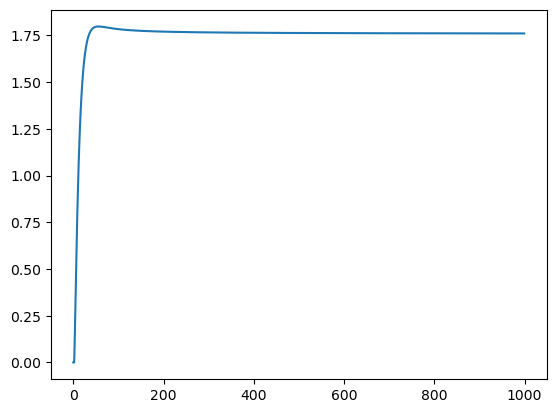

1.7577796618689758


In [4]:
plt.plot(ratio)
plt.show()
plt.plot(current_av)
plt.show()
plt.plot(entropy_production)
plt.show()
print((pup-pdown)*np.log(pup/pdown))